## MG-GY 8401: Programming for Business Intelligence and Analytics
### Lab 5

We will explore dates in the `pandas` package. We will learn to handle dates in different formats to apply operations on panel data. Experience with dates will help us with Homework 5 where we study both dates and times.

#### Load Packages

We will use the `numpy` package for arrays, the `pandas` package for tables and the `matplotlib` package for charts. 

In [1]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import datetime

Note that we will need the `datetime` package for handling dates.

In [2]:
# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 9)

plt.rcParams['figure.figsize'] = (10,8)

We can change the configuration of `pandas` to display at most ten rows and nine columns. We can change the configuration of `matplotlib` to have a figure with width 10 and height 8.

#### Access Datasets

We will be studying data about Influenze like Illnesses abbreviated ILI. These illnesses include the flu.

We use the function `read_csv` to access the content of files into a table. 

In [3]:
google_2004_2007 = pd.read_csv("google_2004_2007.csv")
google_2004_2007

,Week,Queries
0,2004-01-04,0.237716
1,2004-01-11,0.220452
2,2004-01-18,0.225764
3,2004-01-25,0.237716
4,2004-02-01,0.224436
...,...,...
204,2007-12-02,0.345286
205,2007-12-09,0.350598
206,2007-12-16,0.375830
207,2007-12-23,0.443559


In [4]:
google_2008_2011 = pd.read_csv("google_2008_2011.csv")
google_2008_2011

,Week,Queries
0,2008-01-06,0.389110
1,2008-01-13,0.358566
2,2008-01-20,0.378486
3,2008-01-27,0.414343
4,2008-02-03,0.524568
...,...,...
203,2011-11-27,0.478088
204,2011-12-04,0.464807
205,2011-12-11,0.479416
206,2011-12-18,0.537849


Google Trends allows us to access the frequency of queries on the Google search engine. We have two datasets from Google Trends on queries about ILI. The tables have two columns 

- `Week`
  * A week between January 1 2004 and December 31 2011
  * The date of the day at the start of the week identifies the week
- `Queries`
  * The number of queries about ILI divided by the total number of queries 
  * Values are adjusted to lie between 0 and 1.

Using the dataset, we can compare the number of queries on the Goolge search engine about ILI across different weeks.


In [5]:
cdc_2004_2007 = pd.read_csv("cdc_2004_2007.csv")
cdc_2004_2007

,Week,ILI
0,2004-01-10,2.418331
1,2004-01-17,1.809056
2,2004-01-24,1.712024
3,2004-01-31,1.542495
4,2004-02-07,1.437868
...,...,...
204,2007-12-08,1.634051
205,2007-12-15,1.745947
206,2007-12-22,1.936432
207,2007-12-29,2.489053


In [6]:
cdc_2008_2011 = pd.read_csv("cdc_2008_2011.csv")
cdc_2008_2011

,Week,ILI
0,2008-01-12,2.091472
1,2008-01-19,2.359343
2,2008-01-26,3.323314
3,2008-02-02,4.433810
4,2008-02-09,5.345471
...,...,...
203,2011-12-03,1.465723
204,2011-12-10,1.518106
205,2011-12-17,1.663954
206,2011-12-24,1.852736


The Center for Disease Control handles health issues in the United States. We abbreviate the Center for Disease Control as CDC. We have two datasets from the CDC about ILI cases. The tables have two columns 

- `Week`
  * A week between January 1 2004 and December 31 2011
  *  The date of the day at the end of the week identifies the week
- `ILI`
  * The percentage of ILI cases reported to healthcare providers

Using the dataset, we can compare the number of ILI cases reported to the CDC across different weeks.


#### Process Data

We will take four steps to processing the data 

- Convert to Dates 
- Concatenate Tables 
- Join Tables 
- Rename Columns
 
These steps will allow us to combine the four datasets. 

##### Convert to Dates  

We can use the function `to_datetime` to convert strings to dates in `pandas`.

In [7]:
cdc_2004_2007["Week"] = pd.to_datetime(cdc_2004_2007["Week"], format = "%Y-%m-%d")
cdc_2004_2007

,Week,ILI
0,2004-01-10,2.418331
1,2004-01-17,1.809056
2,2004-01-24,1.712024
3,2004-01-31,1.542495
4,2004-02-07,1.437868
...,...,...
204,2007-12-08,1.634051
205,2007-12-15,1.745947
206,2007-12-22,1.936432
207,2007-12-29,2.489053


In [8]:
cdc_2008_2011["Week"] = pd.to_datetime(cdc_2008_2011["Week"], format = "%Y-%m-%d")
cdc_2008_2011

,Week,ILI
0,2008-01-12,2.091472
1,2008-01-19,2.359343
2,2008-01-26,3.323314
3,2008-02-02,4.433810
4,2008-02-09,5.345471
...,...,...
203,2011-12-03,1.465723
204,2011-12-10,1.518106
205,2011-12-17,1.663954
206,2011-12-24,1.852736


In [9]:
google_2004_2007["Week"] = pd.to_datetime(google_2004_2007["Week"], format = "%Y-%m-%d")
google_2004_2007

,Week,Queries
0,2004-01-04,0.237716
1,2004-01-11,0.220452
2,2004-01-18,0.225764
3,2004-01-25,0.237716
4,2004-02-01,0.224436
...,...,...
204,2007-12-02,0.345286
205,2007-12-09,0.350598
206,2007-12-16,0.375830
207,2007-12-23,0.443559


In [10]:
google_2008_2011["Week"] = pd.to_datetime(google_2008_2011["Week"], format = "%Y-%m-%d")
google_2008_2011

,Week,Queries
0,2008-01-06,0.389110
1,2008-01-13,0.358566
2,2008-01-20,0.378486
3,2008-01-27,0.414343
4,2008-02-03,0.524568
...,...,...
203,2011-11-27,0.478088
204,2011-12-04,0.464807
205,2011-12-11,0.479416
206,2011-12-18,0.537849


##### Concatenate Tables 

We can check the range of dates for the tables from the CDC.

In [11]:
cdc_2004_2007["Week"].min()

Timestamp('2004-01-10 00:00:00')

In [12]:
cdc_2004_2007["Week"].max()

Timestamp('2008-01-05 00:00:00')

In [13]:
cdc_2008_2011["Week"].min()

Timestamp('2008-01-12 00:00:00')

In [14]:
cdc_2008_2011["Week"].max()

Timestamp('2011-12-31 00:00:00')

We learn that the dates in the tables from the CDC are not overlapping. So we can combine the two tables from the CDC.

In [15]:
cdc = pd.concat([cdc_2004_2007, cdc_2008_2011])
cdc

,Week,ILI
0,2004-01-10,2.418331
1,2004-01-17,1.809056
2,2004-01-24,1.712024
3,2004-01-31,1.542495
4,2004-02-07,1.437868
...,...,...
203,2011-12-03,1.465723
204,2011-12-10,1.518106
205,2011-12-17,1.663954
206,2011-12-24,1.852736


We can check the range of dates for the table from Google.

In [16]:
google_2004_2007["Week"].min()

Timestamp('2004-01-04 00:00:00')

In [17]:
google_2004_2007["Week"].max()

Timestamp('2007-12-30 00:00:00')

In [18]:
google_2008_2011["Week"].min()

Timestamp('2008-01-06 00:00:00')

In [19]:
google_2008_2011["Week"].max()

Timestamp('2011-12-25 00:00:00')

We learn that the dates in the tables from Google are not overlapping. So we can combine the two tables from the Google.

In [20]:
google = pd.concat([google_2004_2007, google_2008_2011])
google

,Week,Queries
0,2004-01-04,0.237716
1,2004-01-11,0.220452
2,2004-01-18,0.225764
3,2004-01-25,0.237716
4,2004-02-01,0.224436
...,...,...
203,2011-11-27,0.478088
204,2011-12-04,0.464807
205,2011-12-11,0.479416
206,2011-12-18,0.537849


##### Join Tables

We want to use an inner join to combine the table from Google and the table from the CDC. 

In [21]:
days = datetime.timedelta(days = 6)

Note that Google identifies the week by the date of the day at the start of the week. However the CDC identifies the week by the date of the day at the start of the week.

In [22]:
google["CDC Week"] = google["Week"] + days
google

,Week,Queries,CDC Week
0,2004-01-04,0.237716,2004-01-10
1,2004-01-11,0.220452,2004-01-17
2,2004-01-18,0.225764,2004-01-24
3,2004-01-25,0.237716,2004-01-31
4,2004-02-01,0.224436,2004-02-07
...,...,...,...
203,2011-11-27,0.478088,2011-12-03
204,2011-12-04,0.464807,2011-12-10
205,2011-12-11,0.479416,2011-12-17
206,2011-12-18,0.537849,2011-12-24


We can use the `datatime` package to add six days to the dates in the `Week` column of the table from Google.

In [23]:
cdc_google = pd.merge(left = cdc, right = google, how = "inner", left_on = "Week", right_on = "CDC Week")
cdc_google

,Week_x,ILI,Week_y,Queries,CDC Week
0,2004-01-10,2.418331,2004-01-04,0.237716,2004-01-10
1,2004-01-17,1.809056,2004-01-11,0.220452,2004-01-17
2,2004-01-24,1.712024,2004-01-18,0.225764,2004-01-24
3,2004-01-31,1.542495,2004-01-25,0.237716,2004-01-31
4,2004-02-07,1.437868,2004-02-01,0.224436,2004-02-07
...,...,...,...,...,...
412,2011-12-03,1.465723,2011-11-27,0.478088,2011-12-03
413,2011-12-10,1.518106,2011-12-04,0.464807,2011-12-10
414,2011-12-17,1.663954,2011-12-11,0.479416,2011-12-17
415,2011-12-24,1.852736,2011-12-18,0.537849,2011-12-24


Now we can perform an inner join. 

##### Rename Columns

We can drop the column `CDC Week` that we need for the inner join.

In [24]:
cdc_google = cdc_google.drop(columns = ["CDC Week"])
cdc_google

,Week_x,ILI,Week_y,Queries
0,2004-01-10,2.418331,2004-01-04,0.237716
1,2004-01-17,1.809056,2004-01-11,0.220452
2,2004-01-24,1.712024,2004-01-18,0.225764
3,2004-01-31,1.542495,2004-01-25,0.237716
4,2004-02-07,1.437868,2004-02-01,0.224436
...,...,...,...,...
412,2011-12-03,1.465723,2011-11-27,0.478088
413,2011-12-10,1.518106,2011-12-04,0.464807
414,2011-12-17,1.663954,2011-12-11,0.479416
415,2011-12-24,1.852736,2011-12-18,0.537849


Remember that column headers are unique. So `pandas` renamed the two column header `Week` to avoid duplication in the column headers.

In [25]:
cdc_google = cdc_google.rename(columns = {"Week_y" : "Week Start", "Week_x" : "Week Finish"})
cdc_google

,Week Finish,ILI,Week Start,Queries
0,2004-01-10,2.418331,2004-01-04,0.237716
1,2004-01-17,1.809056,2004-01-11,0.220452
2,2004-01-24,1.712024,2004-01-18,0.225764
3,2004-01-31,1.542495,2004-01-25,0.237716
4,2004-02-07,1.437868,2004-02-01,0.224436
...,...,...,...,...
412,2011-12-03,1.465723,2011-11-27,0.478088
413,2011-12-10,1.518106,2011-12-04,0.464807
414,2011-12-17,1.663954,2011-12-11,0.479416
415,2011-12-24,1.852736,2011-12-18,0.537849


#### Analyze Patterns

Have processed the data, we can understand the relationship between ILI cases and ILI queries.

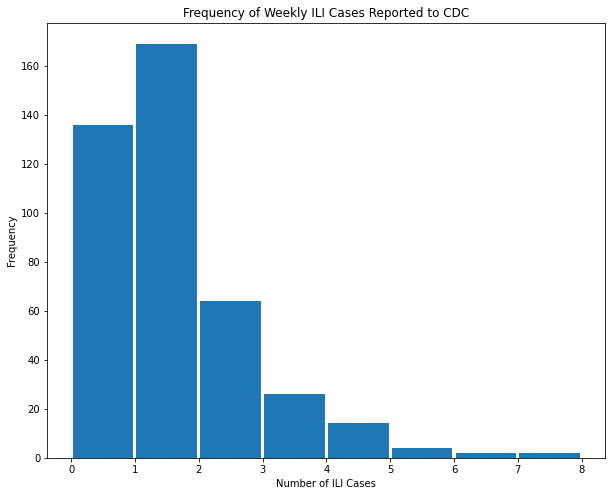

In [26]:
horizontal_data = cdc_google["ILI"]

plt.hist(horizontal_data, bins = range(9), rwidth = 0.95)
plt.title("Frequency of Weekly ILI Cases Reported to CDC")
plt.ylabel("Frequency")
plt.xlabel("Number of ILI Cases");

We can generate a histogram to understand the range of values for ILI cases. We find that most values are between 0\% and 4\% with some outliers.

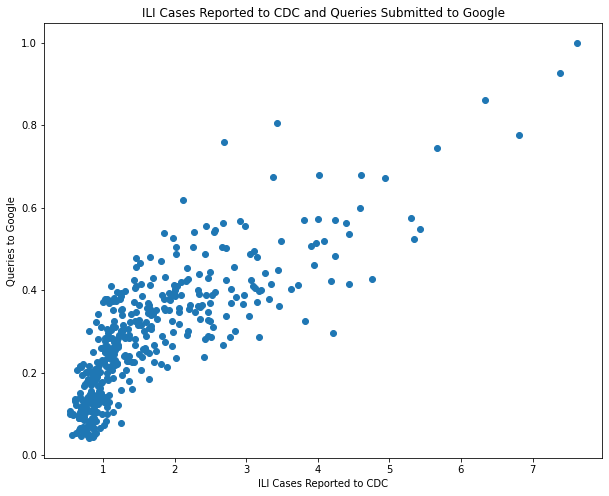

In [27]:
horizontal_data = cdc_google["ILI"]
vertical_data = cdc_google["Queries"]

plt.scatter(horizontal_data, vertical_data)
plt.title("ILI Cases Reported to CDC and Queries Submitted to Google")
plt.ylabel("Queries to Google")
plt.xlabel("ILI Cases Reported to CDC");

We can generate a scatter-plot to show the relationship between ILI cases and ILI queries. 

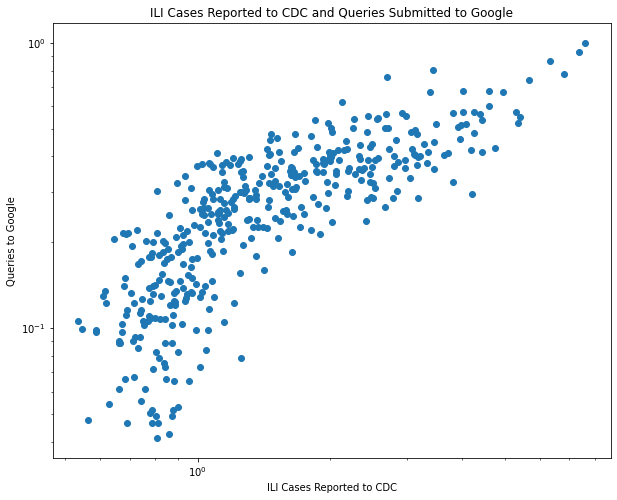

In [28]:
horizontal_data = cdc_google["ILI"]
vertical_data = cdc_google["Queries"]

plt.scatter(horizontal_data, vertical_data)
plt.title("ILI Cases Reported to CDC and Queries Submitted to Google")
plt.ylabel("Queries to Google")
plt.xlabel("ILI Cases Reported to CDC")
plt.yscale('log')
plt.xscale('log');

We learned from the histogram that we have a wide range of values for ILI cases. It can be helpful to use logarithmic scale. Here we can transform a large range of numbers to a small range of numbers by plotting powers of 10

> $10^0$,$10^1$,$10^2$,...

instead of multiples of 1

> 1,2,3,...